# Tarea 09 — Unidad 04 (Eliminación Gaussiana / Gauss–Jordan)

- Dax Navarrete



In [1]:
import sys
from fractions import Fraction

sys.path.append("/home/daxrpm/Desktop/EPN/metodos_numericos/nm-hw-9")

import nm_hw9 as hw

hw.self_test()


## Ejercicio 1 — Interpretación geométrica (solución algebraica para apoyar la gráfica)

Para cada sistema se indica la matriz aumentada y el tipo de intersección:

### (a)
\[
\begin{cases}
 x_1 + 2x_2 = 0\\
 x_1 - x_2 = 0
\end{cases}
\]

### (b)
\[
\begin{cases}
 x_1 + 2x_2 = 3\\
 -2x_1 - 4x_2 = 6
\end{cases}
\]

### (c)
\[
\begin{cases}
 2x_1 + x_2 = -1\\
 x_1 + x_2 = 2\\
 x_1 - 3x_2 = 5
\end{cases}
\]

### (d)
\[
\begin{cases}
 2x_1 + x_2 + x_3 = 1\\
 2x_1 + 4x_2 - x_3 = -1
\end{cases}
\]


In [2]:
def frac(x: int, y: int) -> float:
    return float(Fraction(x, y))


def show_solution(A, b, *, method="gauss", **kwargs):
    if method == "gauss":
        x = hw.solve_gauss(A, b, **kwargs)
    elif method == "gj":
        x = hw.solve_gauss_jordan(A, b, **kwargs)
    else:
        raise ValueError("method must be 'gauss' or 'gj'")

    kind = hw.classify_linear_system(A, b)
    r = hw.check_solution(A, b, x)
    return {"kind": kind, "x": x, "residual": r}


In [3]:
# Ejercicio 1

# (a)
A1a = [[1, 2],
       [1, -1]]
b1a = [0, 0]

# (b)
A1b = [[1, 2],
       [-2, -4]]
b1b = [3, 6]

# (c)
A1c = [[2, 1],
       [1, 1],
       [1, -3]]
b1c = [-1, 2, 5]

# (d)
A1d = [[2, 1, 1],
       [2, 4, -1]]
b1d = [1, -1]

print("(a)", show_solution(A1a, b1a, pivot="partial"))
print("(b)", hw.classify_linear_system(A1b, b1b))
print("(c)", hw.classify_linear_system(A1c, b1c))

# Para (d) hay 2 ecuaciones / 3 incógnitas: esperamos infinitas soluciones (una recta de intersección de planos)
print("(d)", hw.classify_linear_system(A1d, b1d))

# Para (b) y (c) se usa solo clasificación porque no siempre hay solución única.


(a) {'kind': 'unique', 'x': [0.0, -0.0], 'residual': [0.0, 0.0]}
(b) inconsistent
(c) inconsistent
(d) infinite


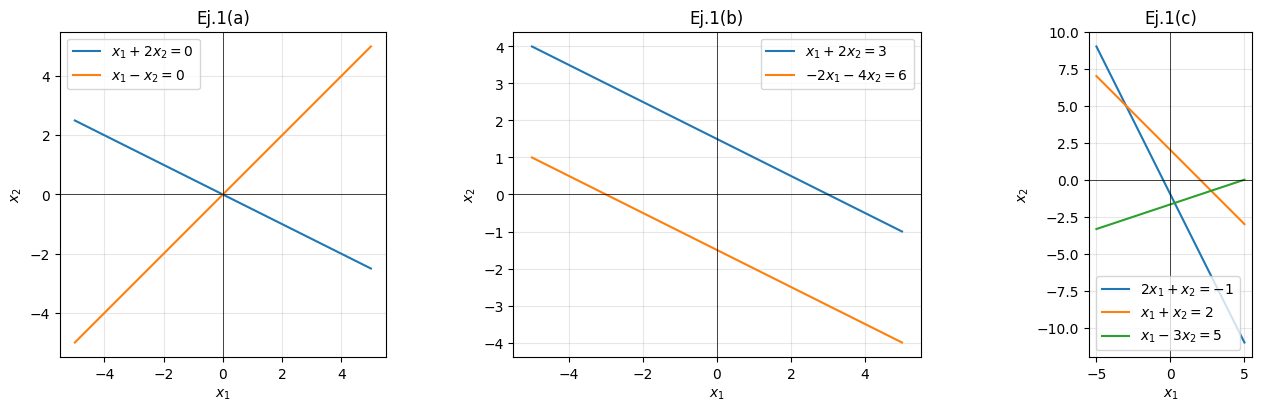

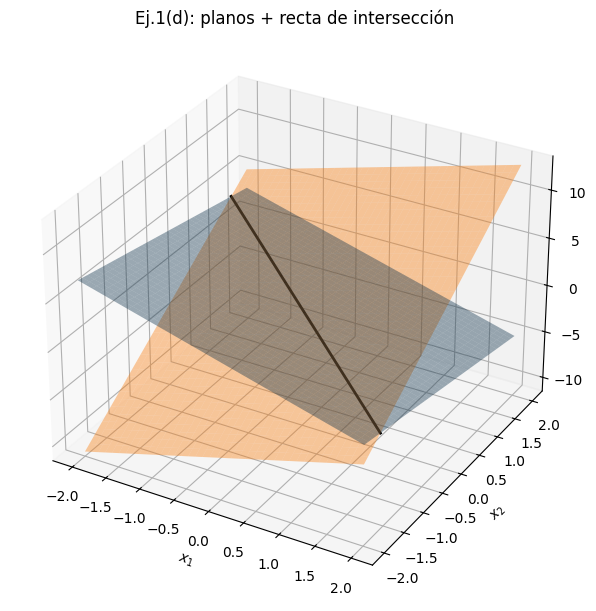

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401


def plot_line_implicit_2d(ax, a1, a2, b, xlim=(-5, 5), *, label=None):
    xs = np.linspace(xlim[0], xlim[1], 400)
    if abs(a2) < 1e-12:
        # vertical line: a1*x = b
        if abs(a1) < 1e-12:
            return
        x0 = b / a1
        ax.plot([x0, x0], [xlim[0], xlim[1]], label=label)
        return
    ys = (b - a1 * xs) / a2
    ax.plot(xs, ys, label=label)


fig, axs = plt.subplots(1, 3, figsize=(14, 4), constrained_layout=True)

# (a)
ax = axs[0]
plot_line_implicit_2d(ax, 1, 2, 0, label=r"$x_1+2x_2=0$")
plot_line_implicit_2d(ax, 1, -1, 0, label=r"$x_1-x_2=0$")
ax.set_title("Ej.1(a)")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.axhline(0, color="k", lw=0.5)
ax.axvline(0, color="k", lw=0.5)
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_aspect("equal", adjustable="box")

# (b)
ax = axs[1]
plot_line_implicit_2d(ax, 1, 2, 3, label=r"$x_1+2x_2=3$")
plot_line_implicit_2d(ax, -2, -4, 6, label=r"$-2x_1-4x_2=6$")
ax.set_title("Ej.1(b)")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.axhline(0, color="k", lw=0.5)
ax.axvline(0, color="k", lw=0.5)
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_aspect("equal", adjustable="box")

# (c)
ax = axs[2]
plot_line_implicit_2d(ax, 2, 1, -1, label=r"$2x_1+x_2=-1$")
plot_line_implicit_2d(ax, 1, 1, 2, label=r"$x_1+x_2=2$")
plot_line_implicit_2d(ax, 1, -3, 5, label=r"$x_1-3x_2=5$")
ax.set_title("Ej.1(c)")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.axhline(0, color="k", lw=0.5)
ax.axvline(0, color="k", lw=0.5)
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_aspect("equal", adjustable="box")

plt.show()

# (d) — 2 planos en R^3
fig = plt.figure(figsize=(7, 6), constrained_layout=True)
ax = fig.add_subplot(111, projection="3d")

x1 = np.linspace(-2, 2, 40)
x2 = np.linspace(-2, 2, 40)
X1, X2 = np.meshgrid(x1, x2)

# Plano 1: 2x1 + x2 + x3 = 1 -> x3 = 1 - 2x1 - x2
Z1 = 1 - 2 * X1 - X2

# Plano 2: 2x1 + 4x2 - x3 = -1 -> x3 = 1 + 2x1 + 4x2
Z2 = 1 + 2 * X1 + 4 * X2

ax.plot_surface(X1, X2, Z1, alpha=0.4)
ax.plot_surface(X1, X2, Z2, alpha=0.4)

# Recta de intersección (paramétrica):
# x2 = -(4/5)x1, x3 = 1 - (6/5)x1
T = np.linspace(-2, 2, 200)
Lx1 = T
Lx2 = -(4 / 5) * T
Lx3 = 1 - (6 / 5) * T
ax.plot(Lx1, Lx2, Lx3, color="k", lw=2)

ax.set_title("Ej.1(d): planos + recta de intersección")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.set_zlabel(r"$x_3$")

plt.show()

## Ejercicio 2 — Eliminación Gaussiana + sustitución hacia atrás con redondeo de 2 cifras significativas

**Instrucción:** No reordenar ecuaciones.

La solución exacta para cada sistema es \(x_1=-1,\;x_2=2,\;x_3=3\).

### (a)
\[
\begin{cases}
- x_1 + 4x_2 + x_3 = 8\\
\frac{5}{3}x_1 + \frac{2}{3}x_2 + \frac{2}{3}x_3 = 1\\
2x_1 + x_2 + 4x_3 = 11
\end{cases}
\]

### (b)
\[
\begin{cases}
4x_1 + 2x_2 - x_3 = -5\\
\frac{1}{9}x_1 + \frac{1}{9}x_2 - \frac{1}{9}x_3 = -1\\
x_1 + 4x_2 + 2x_3 = 9
\end{cases}
\]


## Ejercicio 4 — Eliminación Gaussiana con aritmética de 32 bits

### (a)
\[
\begin{cases}
\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 = 9\\
\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 = 8\\
\frac{1}{2}x_1 + x_2 + 2x_3 = 8
\end{cases}
\]

### (b)
\[
\begin{cases}
3.333x_1 + 15920x_2 - 10.333x_3 = 15913\\
2.222x_1 + 16.71x_2 + 9.612x_3 = 28.544\\
1.5611x_1 + 5.1791x_2 + 1.6852x_3 = 8.4254
\end{cases}
\]

### (c)
\[
\begin{cases}
 x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 + \frac{1}{4}x_4 = \frac{1}{6}\\
 \frac{1}{2}x_1 + \frac{1}{3}x_2 + \frac{1}{4}x_3 + \frac{1}{5}x_4 = \frac{1}{7}\\
 \frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 + \frac{1}{6}x_4 = \frac{1}{8}\\
 \frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 + \frac{1}{7}x_4 = \frac{1}{9}
\end{cases}
\]

### (d)
\[
\begin{cases}
2x_1 + x_2 - x_3 + x_4 - 3x_5 = 7\\
x_1 + 2x_3 - x_4 + x_5 = 2\\
-2x_2 - x_3 + x_4 - x_5 = -5\\
3x_1 + x_2 - 4x_3 + 5x_5 = 6\\
x_1 - x_2 - x_3 - x_4 + x_5 = -3
\end{cases}
\]


In [4]:
# Ejercicio 2 (redondeo 2 cifras significativas, sin pivoting / sin reordenar)

# (a)
A2a = [
    [-1.0, 4.0, 1.0],
    [frac(5, 3), frac(2, 3), frac(2, 3)],
    [2.0, 1.0, 4.0],
]
b2a = [8.0, 1.0, 11.0]

# (b)
A2b = [
    [4.0, 2.0, -1.0],
    [frac(1, 9), frac(1, 9), -frac(1, 9)],
    [1.0, 4.0, 2.0],
]
b2b = [-5.0, -1.0, 9.0]

x_exact = [-1.0, 2.0, 3.0]

x2a = hw.solve_gauss(A2a, b2a, pivot="none", rounding_sig=2)
x2b = hw.solve_gauss(A2b, b2b, pivot="none", rounding_sig=2)

print("x exacta:", x_exact)
print("(a) x aprox (2 cifras):", x2a, "residual:", hw.check_solution(A2a, b2a, x2a))
print("(b) x aprox (2 cifras):", x2b, "residual:", hw.check_solution(A2b, b2b, x2b))


x exacta: [-1.0, 2.0, 3.0]
(a) x aprox (2 cifras): [-0.8129032258064521, 1.0709677419354837, 2.903225806451613] residual: [0.0, 0.29462365591397743, 0.05806451612903096]
(b) x aprox (2 cifras): [2.1954545454545458, -2.5575757575757585, 8.666666666666666] residual: [0.0, -0.0031986531986532007, 0.29848484848484347]


## Ejercicio 3 — Eliminación Gaussiana y necesidad de intercambios de fila

Resolver (si es posible) y determinar si se necesitan intercambios de fila.

### (a)
\[
\begin{cases}
 x_1 - x_2 + 3x_3 = 2\\
 3x_1 - 3x_2 + x_3 = -1\\
 x_1 + x_2 = 3
\end{cases}
\]

### (b)
\[
\begin{cases}
 2x_1 - 1.5x_2 + 3x_3 = 1\\
 -x_1 + 2x_3 = 3\\
 4x_1 - 4.5x_2 + 5x_3 = 1
\end{cases}
\]

### (c)
\[
\begin{cases}
 2x_1 = 3\\
 x_1 + 1.5x_2 = 4.5\\
 -3x_2 + 0.5x_3 = -6.6\\
 2x_1 - 2x_2 + x_3 + x_4 = 0.8
\end{cases}
\]

### (d)
\[
\begin{cases}
 x_1 + x_2 + x_4 = 2\\
 2x_1 + x_2 - x_3 + x_4 = 1\\
 4x_1 - x_2 - 2x_3 + 2x_4 = 0\\
 3x_1 - x_2 - x_3 + 2x_4 = -3
\end{cases}
\]


In [13]:
# Ejercicio 3

def needs_row_swaps(A, b, tol=1e-12):
    U, y, _ = hw.gaussian_elimination(A, b, pivot="none", tol=tol)

    n = min(len(U), len(U[0]))
    return any(abs(U[i][i]) <= tol for i in range(n))


def solve_both(A, b):
    out = {}
    out["needs_swap_if_no_pivot"] = needs_row_swaps(A, b)
    out["class"] = hw.classify_linear_system(A, b)

    if out["class"] == "unique":
        try:
            out["x_no_pivot"] = hw.solve_gauss(A, b, pivot="none")
        except ZeroDivisionError as e:
            out["x_no_pivot"] = None
            out["x_no_pivot_error"] = str(e)

        out["x_partial_pivot"] = hw.solve_gauss(A, b, pivot="partial")
    return out

# (a)
A3a = [[1.0, -1.0, 3.0],
       [3.0, -3.0, 1.0],
       [1.0, 1.0, 0.0]]
b3a = [2.0, -1.0, 3.0]

# (b)
A3b = [[2.0, -1.5, 3.0],
       [-1.0, 0.0, 2.0],
       [4.0, -4.5, 5.0]]
b3b = [1.0, 3.0, 1.0]

# (c) 4 ecuaciones / 4 incógnitas
A3c = [[2.0, 0.0, 0.0, 0.0],
       [1.0, 1.5, 0.0, 0.0],
       [0.0, -3.0, 0.5, 0.0],
       [2.0, -2.0, 1.0, 1.0]]
b3c = [3.0, 4.5, -6.6, 0.8]

# (d)
A3d = [[1.0, 1.0, 0.0, 1.0],
       [2.0, 1.0, -1.0, 1.0],
       [4.0, -1.0, -2.0, 2.0],
       [3.0, -1.0, -1.0, 2.0]]
b3d = [2.0, 1.0, 0.0, -3.0]

print("(a)", solve_both(A3a, b3a))
print("(b)", solve_both(A3b, b3b))
print("(c)", solve_both(A3c, b3c))
print("(d)", solve_both(A3d, b3d))


(a) {'needs_swap_if_no_pivot': True, 'class': 'unique', 'x_no_pivot': None, 'x_no_pivot_error': 'Zero (or near-zero) pivot at row 1: 0.0', 'x_partial_pivot': [1.1875, 1.8125, 0.8750000000000001]}
(b) {'needs_swap_if_no_pivot': False, 'class': 'unique', 'x_no_pivot': [-1.0, -0.0, 1.0], 'x_partial_pivot': [-1.0, -0.0, 1.0]}
(c) {'needs_swap_if_no_pivot': False, 'class': 'unique', 'x_no_pivot': [1.5, 2.0, -1.1999999999999993, 2.999999999999999], 'x_partial_pivot': [1.5, 2.0, -1.1999999999999995, 2.999999999999999]}
(d) {'needs_swap_if_no_pivot': True, 'class': 'inconsistent'}


## Ejercicio 4 — Eliminación Gaussiana con aritmética de 32 bits

### (a)
\[
\begin{cases}
\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 = 9\\
\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 = 8\\
\frac{1}{2}x_1 + x_2 + 2x_3 = 8
\end{cases}
\]

### (b)
\[
\begin{cases}
3.333x_1 + 15920x_2 - 10.333x_3 = 15913\\
2.222x_1 + 16.71x_2 + 9.612x_3 = 28.544\\
1.5611x_1 + 5.1791x_2 + 1.6852x_3 = 8.4254
\end{cases}
\]

### (c)
\[
\begin{cases}
 x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 + \frac{1}{4}x_4 = \frac{1}{6}\\
 \frac{1}{2}x_1 + \frac{1}{3}x_2 + \frac{1}{4}x_3 + \frac{1}{5}x_4 = \frac{1}{7}\\
 \frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 + \frac{1}{6}x_4 = \frac{1}{8}\\
 \frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 + \frac{1}{7}x_4 = \frac{1}{9}
\end{cases}
\]

### (d)
\[
\begin{cases}
2x_1 + x_2 - x_3 + x_4 - 3x_5 = 7\\
x_1 + 2x_3 - x_4 + x_5 = 2\\
-2x_2 - x_3 + x_4 - x_5 = -5\\
3x_1 + x_2 - 4x_3 + 5x_5 = 6\\
x_1 - x_2 - x_3 - x_4 + x_5 = -3
\end{cases}
\]


In [8]:
# Ejercicio 4 
# (a)
A4a = [
    [frac(1, 4), frac(1, 5), frac(1, 6)],
    [frac(1, 3), frac(1, 4), frac(1, 5)],
    [frac(1, 2), 1.0, 2.0],
]
b4a = [9.0, 8.0, 8.0]

# (b)
A4b = [
    [3.333, 15920.0, -10.333],
    [2.222, 16.71, 9.612],
    [1.5611, 5.1791, 1.6852],
]
b4b = [15913.0, 28.544, 8.4254]

# (c)
A4c = [
    [1.0, frac(1, 2), frac(1, 3), frac(1, 4)],
    [frac(1, 2), frac(1, 3), frac(1, 4), frac(1, 5)],
    [frac(1, 3), frac(1, 4), frac(1, 5), frac(1, 6)],
    [frac(1, 4), frac(1, 5), frac(1, 6), frac(1, 7)],
]
b4c = [frac(1, 6), frac(1, 7), frac(1, 8), frac(1, 9)]

# (d)
A4d = [
    [2.0, 1.0, -1.0, 1.0, -3.0],
    [1.0, 0.0, 2.0, -1.0, 1.0],
    [0.0, -2.0, -1.0, 1.0, -1.0],
    [3.0, 1.0, -4.0, 0.0, 5.0],
    [1.0, -1.0, -1.0, -1.0, 1.0],
]
b4d = [7.0, 2.0, -5.0, 6.0, -3.0]


def solve_float32(A, b, *, pivot="partial"):
    x = hw.solve_gauss(A, b, pivot=pivot, use_float32=True)
    r = hw.check_solution(A, b, x)
    return x, r

print("4(a)", solve_float32(A4a, b4a))
print("4(b)", solve_float32(A4b, b4b))
print("4(c)", solve_float32(A4c, b4c))
print("4(d)", solve_float32(A4d, b4d))


4(a) ([-227.07695309227756, 476.92320514434033, -177.69236429910077], [8.705948555842724e-06, 1.072883907937694e-05, 0.0])
4(b) ([1.0000948831461256, 0.9999999867785877, 1.0000102352309608], [0.0, 0.0003089904608870597, 0.00016530201561515412])
4(c) ([-0.03173503722669646, 0.5951162795539698, -2.380661511846801, 2.7775896055945806], [2.7755575615628914e-17, -2.5128618519332235e-08, 2.270933016634835e-08, -1.806318462860279e-08])
4(d) ([1.8830408697008245, 2.807017518104267, 0.7309939803739547, 1.4385961754403045, 0.09356715885781568], [-2.4001181486710266e-08, -1.861337548536568e-07, 0.0, 0.0, 3.5464011371999504e-07])


## Ejercicio 5 — Sistema con parámetro \(\alpha\)

Dado el sistema:
\[
\begin{cases}
 x_1 - x_2 + \alpha x_3 = -2\\
 -x_1 + 2x_2 - \alpha x_3 = 3\\
 \alpha x_1 + x_2 + x_3 = 2
\end{cases}
\]

- (a) valores de \(\alpha\) para los que el sistema **no tiene solución**
- (b) valores de \(\alpha\) para los que el sistema tiene **infinitas soluciones**
- (c) si existe solución única para cierta \(\alpha\), hallarla


In [12]:
# Ejercicio 5


def analyze_alpha_grid(alphas):
    out = []
    for a in alphas:
        kind, sol = hw.analyze_alpha_system(a)
        out.append((a, kind, sol))
    return out


# Candidatos razonables: enteros pequeños y algunos racionales
candidates = list(range(-5, 6)) + [0.5, -0.5, 2.0, -2.0, 3.0, -3.0]
results = analyze_alpha_grid(candidates)

for a, kind, sol in results:
    if kind != "unique":
        print("alpha=", a, "->", kind)

# Ejemplo de alpha con solución única:
alpha_ex = 0.0
kind_ex, sol_ex = hw.analyze_alpha_system(alpha_ex)
print("alpha=", alpha_ex, "->", kind_ex, "sol=", sol_ex)

if sol_ex is not None:
    print(
        "residual:",
        hw.check_solution(hw.alpha_system_matrix(alpha_ex), hw.alpha_system_rhs(), sol_ex),
    )


alpha= -1 -> infinite
alpha= 1 -> inconsistent
alpha= 0.0 -> unique sol= [-1.0, 1.0, 1.0]
residual: [0.0, 0.0, 0.0]


### Ejercicio 5 — Cálculo exacto de valores críticos

El criterio estándar:

- Si \(\det(A(\alpha))\neq 0\) entonces hay **solución única**.
- Si \(\det(A(\alpha))=0\) entonces el sistema puede ser **incompatible** (sin solución) o **compatible indeterminado** (infinitas soluciones), y se decide comparando rangos (RREF).


In [9]:
# Ejercicio 5 — determinante y valores críticos


def det_alpha(alpha):
    a = float(alpha)
    return 1.0 - a * a

for a in [-3, -2, -1, 0, 1, 2, 3]:
    print(f"alpha={a:>2}: det={det_alpha(a)}")

print("Valores críticos (det=0): alpha = ±1")

# Clasificación en los críticos:
for a in [-1.0, 1.0]:
    kind, sol = hw.analyze_alpha_system(a)
    print("alpha=", a, "->", kind, "sol=", sol)


alpha=-3: det=-8.0
alpha=-2: det=-3.0
alpha=-1: det=0.0
alpha= 0: det=1.0
alpha= 1: det=0.0
alpha= 2: det=-3.0
alpha= 3: det=-8.0
Valores críticos (det=0): alpha = ±1
alpha= -1.0 -> infinite sol= None
alpha= 1.0 -> inconsistent sol= None


## Ejercicio 6 — Modelo especies/alimento

Datos (de la hoja):

\[
A=\begin{bmatrix}
1&2&0&3\\
1&0&2&2\\
0&0&1&1
\end{bmatrix},\quad
x=\begin{bmatrix}1000\\500\\350\\400\end{bmatrix},\quad
b=\begin{bmatrix}3500\\2700\\900\end{bmatrix}
\]

Preguntas:

- (a) ¿Existe suficiente alimento? (verificar \(Ax \le b\))
- (b) Máximo aumento individual posible de cada especie con el mismo suministro.
- (c) Si la especie 1 se extingue, ¿cuánto incremento individual soportan las demás?
- (d) Si la especie 2 se extingue, ¿cuánto incremento individual soportan las demás?


In [10]:
# Ejercicio 6

A6 = [
    [1.0, 2.0, 0.0, 3.0],
    [1.0, 0.0, 2.0, 2.0],
    [0.0, 0.0, 1.0, 1.0],
]
x6 = [1000.0, 500.0, 350.0, 400.0]
b6 = [3500.0, 2700.0, 900.0]

s6 = hw.food_slack(A6, x6, b6)
print("Slack s = b - A x =", s6)
print("(a) ¿alimento suficiente?", hw.food_is_enough(A6, x6, b6))

print("(b) Máximo aumento individual Δ por especie (manteniendo las demás fijas):")
for j in range(4):
    print(f"  especie {j+1}: Δ_max =", hw.max_individual_increase(A6, x6, b6, j))

print("(c) Si especie 1 se extingue (x1=0), Δ_max individual para las demás:")
for j in [1, 2, 3]:
    print(f"  especie {j+1}: Δ_max =", hw.extinction_max_increase(A6, x6, b6, extinct_species_index=0, target_species_index=j))

print("(d) Si especie 2 se extingue (x2=0), Δ_max individual para las demás:")
for j in [0, 2, 3]:
    print(f"  especie {j+1}: Δ_max =", hw.extinction_max_increase(A6, x6, b6, extinct_species_index=1, target_species_index=j))


Slack s = b - A x = [300.0, 200.0, 150.0]
(a) ¿alimento suficiente? True
(b) Máximo aumento individual Δ por especie (manteniendo las demás fijas):
  especie 1: Δ_max = 200.0
  especie 2: Δ_max = 150.0
  especie 3: Δ_max = 100.0
  especie 4: Δ_max = 100.0
(c) Si especie 1 se extingue (x1=0), Δ_max individual para las demás:
  especie 2: Δ_max = 650.0
  especie 3: Δ_max = 150.0
  especie 4: Δ_max = 150.0
(d) Si especie 2 se extingue (x2=0), Δ_max individual para las demás:
  especie 1: Δ_max = 200.0
  especie 3: Δ_max = 100.0
  especie 4: Δ_max = 100.0


## Ejercicio 7 — Repetir el Ejercicio 4 con Gauss–Jordan

Ahora se resuelven los mismos sistemas del Ejercicio 4, pero usando **Gauss–Jordan (RREF)**, manteniendo la simulación de **float32**.


In [11]:
# Ejercicio 7 (Gauss–Jordan + float32)

def solve_float32_gj(A, b):
    x = hw.solve_gauss_jordan(A, b, use_float32=True)
    r = hw.check_solution(A, b, x)
    return x, r

print("7(a)", solve_float32_gj(A4a, b4a))
print("7(b)", solve_float32_gj(A4b, b4b))
print("7(c)", solve_float32_gj(A4c, b4c))
print("7(d)", solve_float32_gj(A4d, b4d))


7(a) ([-227.07693481445312, 476.9232177734375, -177.69236755371094], [1.52587890625e-05, 1.9327799485324704e-05, 1.52587890625e-05])
7(b) ([0.9998154640197754, 1.0000001192092896, 1.0000100135803223], [0.0011792831428465433, -0.00031179642677159336, -0.0002705868363381825])
7(c) ([-0.031734853982925415, 0.5951137542724609, -2.3806557655334473, 2.777585744857788], [-1.291433970040945e-07, -1.1083625606200798e-07, -4.172325139550903e-08, -7.11234788980386e-08])
7(d) ([1.8830407857894897, 2.8070175647735596, 0.7309940457344055, 1.438596248626709, 0.09356715530157089], [-1.2665987014770508e-07, -2.1606683731079102e-07, -8.195638656616211e-08, -4.842877388000488e-07, 8.195638656616211e-08])
